In [1]:
!pip install fbprophet

In [2]:
!pip install pymongo dnspython

     |████████████████████████████████| 241 kB 4.2 MB/s 


In [3]:
!pip install dnspython

In [4]:
import warnings
from sklearn.metrics import mean_absolute_error
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional
import re
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error
from math import sqrt
import pymongo
import dns

In [5]:
user_name = "Thmo89"
psw = "Authentication "
uri2 = "mongodb+srv://{}:{}@cluster1.mknx2.mongodb.net/myFirstDatabase?retryWrites=true&w=majority".format(user_name, psw)
client = pymongo.MongoClient(uri2)
db = client.Tomates_meteo_Centre15
mycl = db["données"]

In [6]:
Dat = pd.DataFrame(list(mycl.find()))
DT = pd.DataFrame(Dat, columns = ['Rafale max  help', 'soleil_durée',
       'Précipitations en mm',  'Température minimale en °C',
       'Température maximale en °C', 'prix moyen au kg',
       'Production quantité tonne(s)', 'Date'])
DT.to_csv('TMN.csv',index = False)
Pop = pd.read_csv("/content/TMN.csv", parse_dates=['Date'], dayfirst= True)
Pop.sort_values(by=['Date'], inplace=True, ascending=True)  #pour mettre les dates dans l'ordre
Pop

,Rafale max help,soleil_durée,Précipitations en mm,Température minimale en °C,Température maximale en °C,prix moyen au kg,Production quantité tonne(s),Date
0,31.0,583.0,3.0,8.0,22.6,1.500000,0.060000,2012-06-14
1,55.8,198.0,9.3,14.4,22.1,1.500000,0.070000,2012-06-15
2,50.8,156.0,5.0,13.7,18.0,1.433333,0.346667,2012-06-16
3,35.3,728.0,19.9,8.2,21.9,1.366667,0.623333,2012-06-17
4,42.6,258.0,0.0,12.7,20.7,1.300000,0.900000,2012-06-18
...,...,...,...,...,...,...,...,...
3415,39.6,701.0,0.0,14.0,31.2,1.200000,0.100000,2021-12-08
3416,23.0,579.0,0.0,10.5,24.1,1.200000,0.100000,2021-12-09
3417,29.2,351.0,0.0,3.4,16.7,1.200000,0.100000,2021-12-10
3418,36.0,480.0,0.0,-1.0,14.3,1.200000,0.100000,2021-12-11


**Prix**

In [7]:
dfP = Pop[["Date","prix moyen au kg"]]
dfP['ds'] = pd.to_datetime(dfP['Date'])
dfP['y'] = dfP['prix moyen au kg']
dfP = dfP.drop(["Date","prix moyen au kg"], axis=1)
dfP

,ds,y
0,2012-06-14,1.500000
1,2012-06-15,1.500000
2,2012-06-16,1.433333
3,2012-06-17,1.366667
4,2012-06-18,1.300000
...,...,...
3415,2021-12-08,1.200000
3416,2021-12-09,1.200000
3417,2021-12-10,1.200000
3418,2021-12-11,1.200000


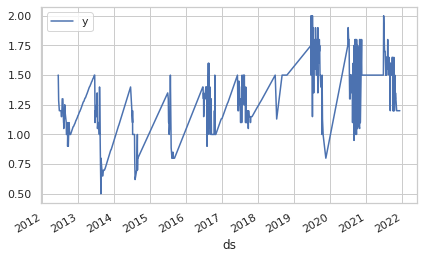

In [8]:
dfP.plot(x='ds',y='y')
plt.show()

In [11]:
s= int(len(dfP)* 0.7)
train=dfP[:s]
test=dfP[s:]

In [12]:
train.shape

(2394, 2)

In [13]:
test.shape

(1026, 2)

In [14]:
from fbprophet import Prophet
m1 = Prophet(daily_seasonality=True)
m1.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [54]:
forecast1 = m1.predict(test)

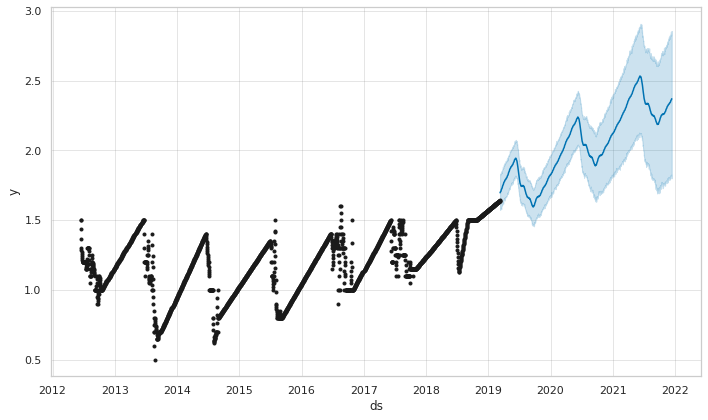

In [43]:
m1.plot(forecast1)
plt.show()

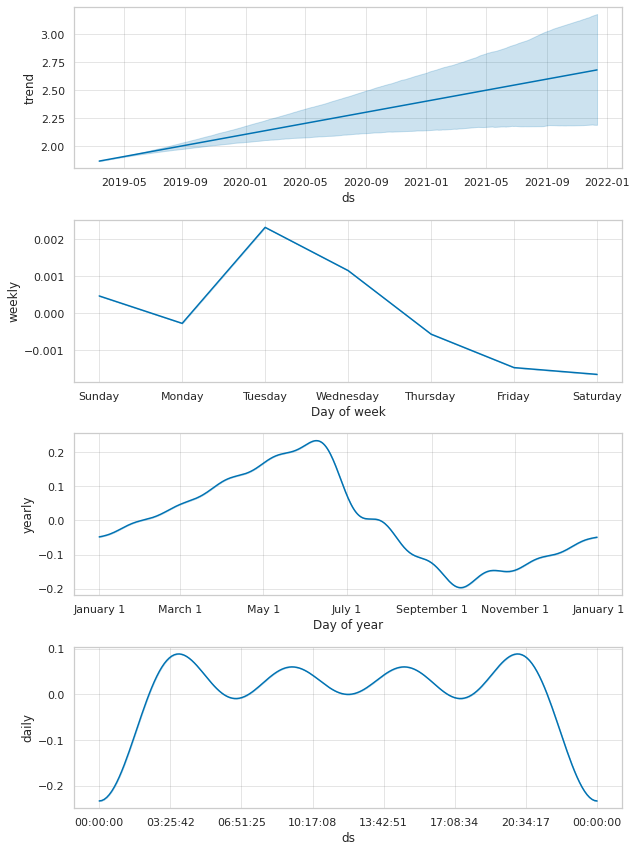

In [20]:
m1.plot_components(forecast1)
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

sqrt(mean_squared_error(test.y, forecast1.yhat))

0.6765017378573623

In [27]:
print("Mean Absolute Error (MAE):", mean_absolute_error(test["y"],forecast1['yhat']))

Mean Absolute Error (MAE): 0.6031780519246279


**Prédictions du prix dans 7 jours**

In [37]:
m11 = Prophet(daily_seasonality=True)
m11.fit(dfP)

In [39]:
future11 = m11.make_future_dataframe(periods=7, freq='D',include_history=True)
predictions1=m11.predict(future11)

In [41]:
predictions1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
3396,2021-12-13,1.449062,1.275123,1.622929
3397,2021-12-14,1.459814,1.281525,1.629445
3398,2021-12-15,1.462880,1.297756,1.640209
3399,2021-12-16,1.470407,1.315870,1.648159
3400,2021-12-17,1.475332,1.301382,1.650914
3401,2021-12-18,1.471105,1.294437,1.641007
3402,2021-12-19,1.475027,1.307992,1.644933


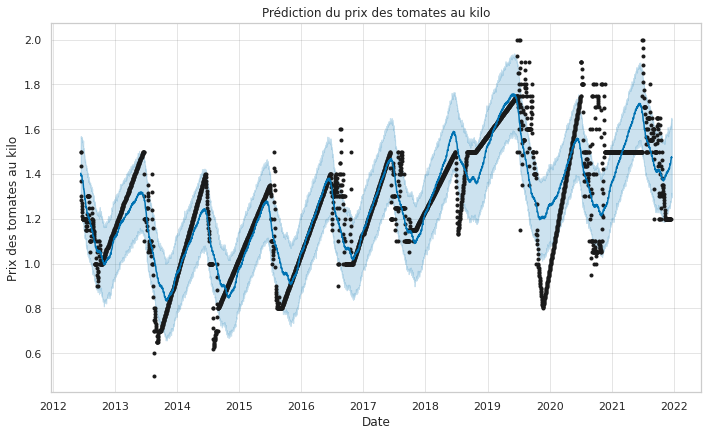

In [42]:
m11.plot(predictions1)
plt.title("Prédiction du prix des tomates au kilo")
plt.xlabel("Date")
plt.ylabel("Prix des tomates au kilo")
plt.show()

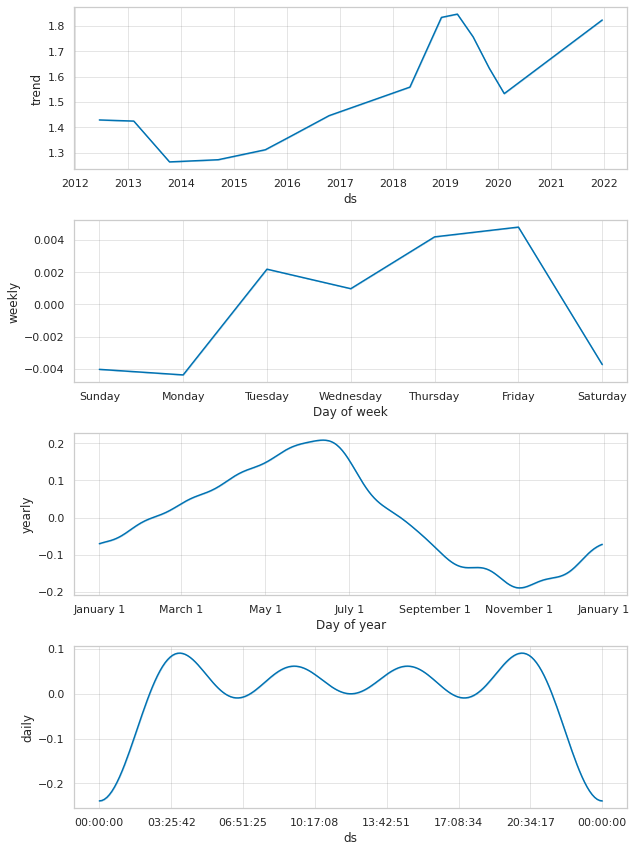

In [44]:
m11.plot_components(predictions1)
plt.show()

In [45]:
metric_df = predictions1.set_index('ds')[['yhat']].join(dfP.set_index('ds').y).reset_index()
metric_df

,ds,yhat,y
0,2012-06-14,1.402497,1.500000
1,2012-06-15,1.402466,1.500000
2,2012-06-16,1.393042,1.433333
3,2012-06-17,1.391540,1.366667
4,2012-06-18,1.389673,1.300000
...,...,...,...
3422,2021-12-15,1.462880,NaN
3423,2021-12-16,1.470407,NaN
3424,2021-12-17,1.475332,NaN
3425,2021-12-18,1.471105,NaN


In [46]:
metric_df[["ds","yhat"]].tail(7)

,ds,yhat
3420,2021-12-13,1.449062
3421,2021-12-14,1.459814
3422,2021-12-15,1.462880
3423,2021-12-16,1.470407
3424,2021-12-17,1.475332
3425,2021-12-18,1.471105
3426,2021-12-19,1.475027


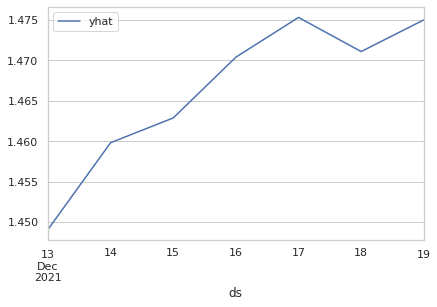

In [47]:
metric_df.tail(7).plot(x="ds", y="yhat")

In [48]:
metric_df.dropna(inplace=True)
rmseP =sqrt(mean_squared_error(metric_df.y, metric_df.yhat))
print(rmseP)
print(mean_absolute_error(metric_df.y, metric_df.yhat))

0.13470785572630428
0.0946227757609462


**Production**

In [49]:
dfPo = Pop[["Date","Production quantité tonne(s)"]]
dfPo['ds'] = pd.to_datetime(dfPo['Date'],infer_datetime_format=True, dayfirst= True)
dfPo['y'] = dfPo['Production quantité tonne(s)']
dfPo = dfPo.drop(["Date","Production quantité tonne(s)"], axis=1)
dfPo

,ds,y
0,2012-06-14,0.060000
1,2012-06-15,0.070000
2,2012-06-16,0.346667
3,2012-06-17,0.623333
4,2012-06-18,0.900000
...,...,...
3415,2021-12-08,0.100000
3416,2021-12-09,0.100000
3417,2021-12-10,0.100000
3418,2021-12-11,0.100000


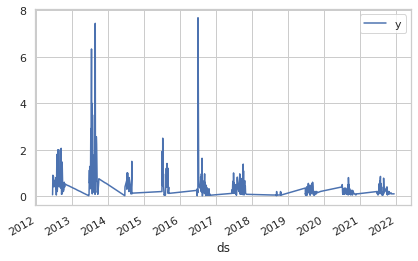

In [50]:
dfPo.plot(x='ds',y='y')
plt.show()

In [51]:
train2=dfPo[:s]
test2=dfPo[s:]

In [52]:
m2 = Prophet(daily_seasonality=True)
m2.fit(train2)

In [53]:
forecast2 = m2.predict(test2)

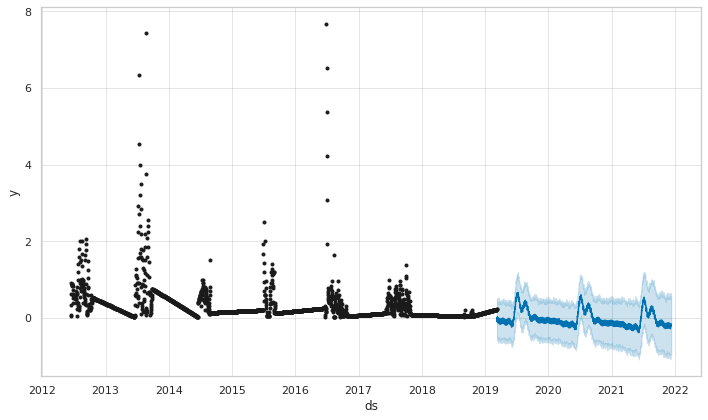

In [55]:
m2.plot(forecast2)
plt.show()

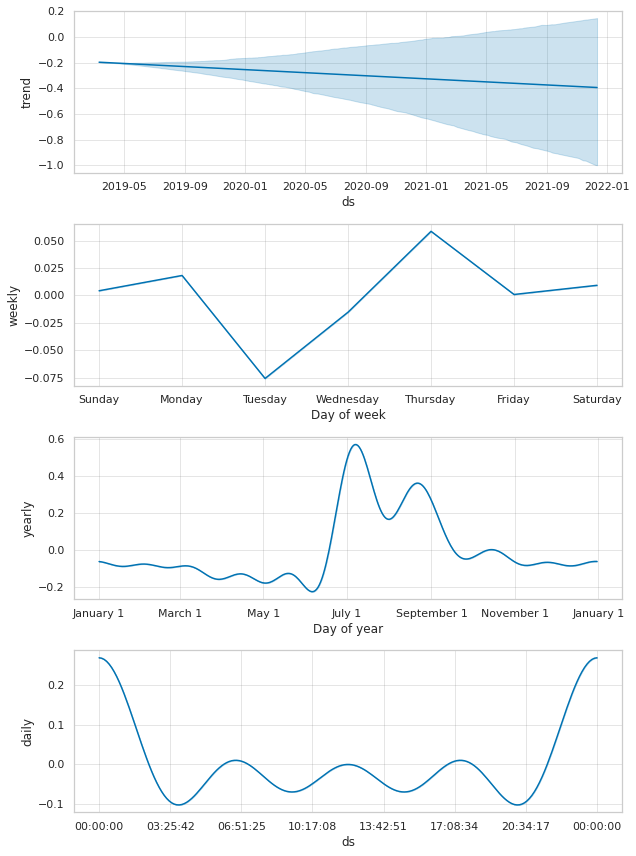

In [56]:
m2.plot_components(forecast2)
plt.show()

In [57]:
sqrt(mean_squared_error(test2.y, forecast2.yhat))

0.32374886799012365

In [58]:
mean_absolute_error(test2["y"],forecast2['yhat'])

0.2934569271271548

**Prédiction de la production dans 7 jours**

In [59]:
m22 = Prophet(daily_seasonality=True)
m22.fit(dfPo)

In [61]:
future2 = m22.make_future_dataframe(periods=7, freq='D',include_history=True)
predictions2=m2.predict(future2)

In [64]:
predictions2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
3396,2021-12-13,-0.193463,-0.972896,0.614469
3397,2021-12-14,-0.287121,-1.068693,0.498985
3398,2021-12-15,-0.225852,-0.976169,0.602005
3399,2021-12-16,-0.150963,-0.909120,0.634515
3400,2021-12-17,-0.207363,-0.970178,0.612209
3401,2021-12-18,-0.197469,-0.990392,0.675342
3402,2021-12-19,-0.200743,-1.009515,0.595937


In [68]:
Po = predictions2[[ 'yhat', 'yhat_lower', 'yhat_upper']].abs()
Po.tail(7)

,yhat,yhat_lower,yhat_upper
3396,0.193463,0.972896,0.614469
3397,0.287121,1.068693,0.498985
3398,0.225852,0.976169,0.602005
3399,0.150963,0.909120,0.634515
3400,0.207363,0.970178,0.612209
3401,0.197469,0.990392,0.675342
3402,0.200743,1.009515,0.595937


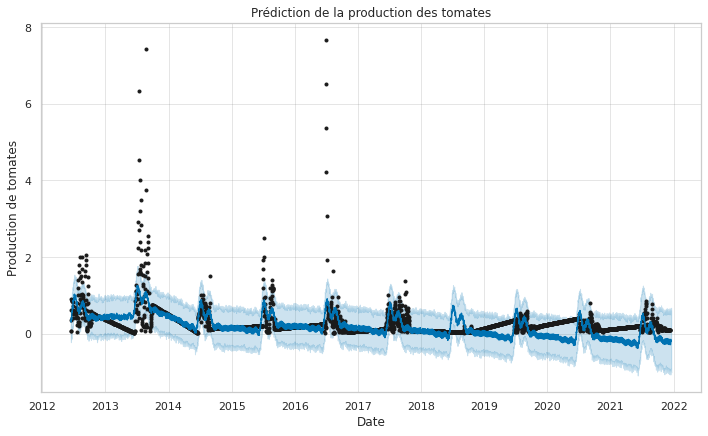

In [77]:
m22.plot(predictions2)
plt.title("Prédiction de la production des tomates")
plt.xlabel("Date")
plt.ylabel("Production de tomates")
plt.show()

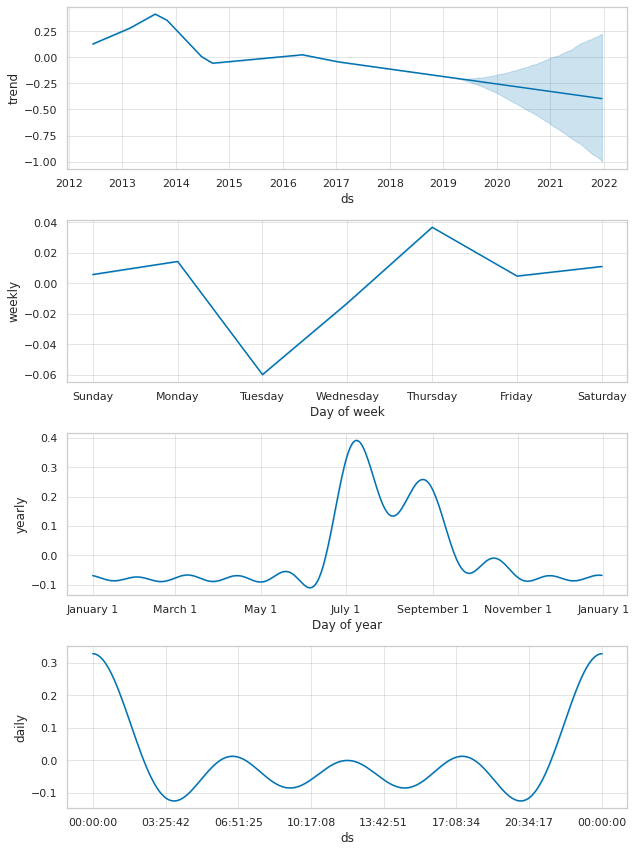

In [78]:
m22.plot_components(predictions2)
plt.show()

In [73]:
P= pd.concat([predictions2['ds'].tail(7), Po['yhat'].tail(7)], axis =1)
P

,ds,yhat
3396,2021-12-13,0.193463
3397,2021-12-14,0.287121
3398,2021-12-15,0.225852
3399,2021-12-16,0.150963
3400,2021-12-17,0.207363
3401,2021-12-18,0.197469
3402,2021-12-19,0.200743


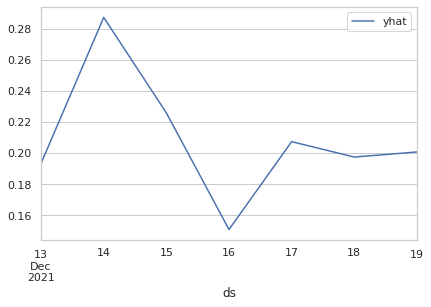

In [80]:
P.plot(x="ds", y="yhat")
plt.show()

**Gridsearch**

In [82]:
#Prix
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation

df_cv1 = cross_validation(m1, initial='19 days', period='10 days', horizon = '7 days')
df_p1 = performance_metrics(df_cv1)
df_p1

INFO:fbprophet:Making 244 forecasts with cutoffs between 2012-07-07 00:00:00 and 2019-03-03 00:00:00


  0%|          | 0/244 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,0.012051,0.109777,0.071296,0.061658,0.040129,0.709402
1,2 days,0.011502,0.107248,0.075026,0.063411,0.045645,0.690377
2,3 days,0.015300,0.123694,0.086865,0.073969,0.049021,0.651261
3,4 days,0.020211,0.142167,0.096183,0.081711,0.051174,0.644351
4,5 days,0.027204,0.164935,0.104796,0.089513,0.050970,0.640167
5,6 days,0.042327,0.205736,0.118907,0.101790,0.053037,0.627119
6,7 days,0.073035,0.270251,0.144289,0.123607,0.056556,0.598326


In [83]:
df_cv2 = cross_validation(m1, initial='190 days', period='106 days', horizon = '7 days')
df_p2 = performance_metrics(df_cv2)
df_p2

INFO:fbprophet:Making 22 forecasts with cutoffs between 2013-01-27 00:00:00 and 2019-03-03 00:00:00


  0%|          | 0/22 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,0.006753,0.082174,0.060143,0.050751,0.035257,0.761905
1,2 days,0.006051,0.077785,0.058812,0.050142,0.044052,0.809524
2,3 days,0.005808,0.076213,0.059028,0.050574,0.051193,0.772727
3,4 days,0.007534,0.086801,0.067433,0.056640,0.057703,0.727273
4,5 days,0.011000,0.104880,0.079299,0.064561,0.062007,0.714286
5,6 days,0.013099,0.114450,0.084222,0.069621,0.057593,0.681818
6,7 days,0.015073,0.122771,0.087153,0.071968,0.052088,0.684211


In [84]:
df_cv3 = cross_validation(m1, initial='79 days', period='7 days', horizon = '19 days')
df_p3 = performance_metrics(df_cv3)
df_p3

INFO:fbprophet:Making 338 forecasts with cutoffs between 2012-09-04 00:00:00 and 2019-02-19 00:00:00


  0%|          | 0/338 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,2 days,0.012499,0.111797,0.074977,0.064769,0.043873,0.703599
1,3 days,0.013335,0.115476,0.078616,0.067760,0.047320,0.688916
2,4 days,0.014512,0.120467,0.082613,0.071036,0.047379,0.675210
3,5 days,0.017494,0.132265,0.089020,0.076831,0.049314,0.658234
4,6 days,0.023081,0.151925,0.098734,0.085331,0.050735,0.652011
5,7 days,0.031342,0.177036,0.110684,0.095688,0.054491,0.647679
6,8 days,0.038157,0.195339,0.117907,0.102620,0.056065,0.634665
7,9 days,0.046783,0.216295,0.124636,0.109674,0.056062,0.626544
8,10 days,0.058268,0.241388,0.130118,0.114263,0.056256,0.626505
9,11 days,0.075820,0.275354,0.139304,0.122312,0.056956,0.614323


In [85]:
df_cv4 = cross_validation(m1, initial='200 days', period='123 days', horizon = '12 days')
df_p4 = performance_metrics(df_cv4)
df_p4

INFO:fbprophet:Making 19 forecasts with cutoffs between 2013-02-03 00:00:00 and 2019-02-26 00:00:00


  0%|          | 0/19 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,2 days,0.005854,0.076514,0.059075,0.049058,0.031084,0.811005
1,3 days,0.011852,0.108866,0.074427,0.058103,0.042535,0.744019
2,4 days,0.009000,0.094867,0.072867,0.058123,0.044502,0.736842
3,5 days,0.007792,0.088273,0.068902,0.056338,0.046684,0.724880
4,6 days,0.010190,0.100948,0.082107,0.067608,0.068892,0.598485
5,7 days,0.012594,0.112223,0.091635,0.075474,0.062714,0.533493
6,8 days,0.015628,0.125013,0.100125,0.082127,0.064560,0.526316
7,9 days,0.019667,0.140239,0.105703,0.087058,0.069283,0.550239
8,10 days,0.024451,0.156368,0.112237,0.092250,0.074831,0.530303
9,11 days,0.032359,0.179885,0.125379,0.102885,0.080755,0.437799


In [86]:
# Production

df_cv5 = cross_validation(m2, initial='200 days', period='123 days', horizon = '14 days')
df_p5 = performance_metrics(df_cv5)
df_p5

INFO:fbprophet:Making 19 forecasts with cutoffs between 2013-02-01 00:00:00 and 2019-02-24 00:00:00


  0%|          | 0/19 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,2 days,0.029879,0.172856,0.133047,1.412087,0.536052,1.000000
1,3 days,0.033956,0.184273,0.146151,1.458321,0.762468,1.000000
2,4 days,0.035314,0.187919,0.145340,1.664212,0.712351,1.000000
3,5 days,0.045801,0.214013,0.162982,1.928567,0.563665,0.961538
4,6 days,0.054537,0.233532,0.194037,2.307202,1.023804,0.947368
5,7 days,0.061684,0.248363,0.199113,3.194380,0.920463,0.945344
6,8 days,0.066656,0.258178,0.208376,2.967444,0.809093,0.946581
7,9 days,0.068799,0.262296,0.207695,2.737516,1.470359,0.908907
8,10 days,0.076963,0.277422,0.222132,3.140349,0.987170,0.894737
9,11 days,0.080400,0.283548,0.228173,3.116349,1.090546,0.890688


In [87]:
df_cv6 = cross_validation(m2, initial='250 days', period='150 days', horizon = '16 days')
df_p6 = performance_metrics(df_cv6)
df_p6

INFO:fbprophet:Making 15 forecasts with cutoffs between 2013-05-24 00:00:00 and 2019-02-22 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,2 days,0.060471,0.245909,0.163494,1.212850,0.908061,0.933333
1,3 days,0.073197,0.270550,0.179589,1.221348,0.908061,0.930435
2,4 days,0.074056,0.272133,0.189763,1.126693,1.091816,0.931677
3,5 days,0.061769,0.248533,0.187795,1.022326,0.817929,0.976812
4,6 days,0.057467,0.239723,0.180318,0.946465,1.045798,0.956522
5,7 days,0.064889,0.254733,0.201937,1.138051,1.163535,0.933333
6,8 days,0.066218,0.257329,0.189731,1.110425,0.905305,0.930435
7,9 days,0.063063,0.251124,0.169459,1.056291,0.802772,0.931677
8,10 days,0.081651,0.285746,0.194891,1.503423,0.643496,0.930435
9,11 days,0.110281,0.332086,0.238695,1.925975,1.134299,0.928571


In [88]:
df_cv7 = cross_validation(m2, initial='345 days', period='179 days', horizon = '8 days')
df_p7 = performance_metrics(df_cv7)
df_p7

INFO:fbprophet:Making 12 forecasts with cutoffs between 2013-10-10 00:00:00 and 2019-03-02 00:00:00


  0%|          | 0/12 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,0.016726,0.129330,0.098488,0.533990,0.389273,1.0
1,2 days,0.014001,0.118325,0.093983,0.609880,0.474828,1.0
2,3 days,0.020495,0.143162,0.116174,0.674026,0.520727,1.0
3,4 days,0.028318,0.168280,0.138008,0.856325,0.521595,1.0
4,5 days,0.020570,0.143424,0.121606,0.799763,0.599148,1.0
5,6 days,0.022369,0.149562,0.121140,0.684747,0.751935,1.0
6,7 days,0.041404,0.203480,0.159270,0.778365,0.735417,1.0
7,8 days,0.026718,0.163457,0.138295,1.170890,0.893503,1.0


In [89]:
df_cv8 = cross_validation(m2, initial='150 days', period='200 days', horizon = '20 days')
df_p8 = performance_metrics(df_cv8)
df_p8

INFO:fbprophet:Making 12 forecasts with cutoffs between 2013-02-09 00:00:00 and 2019-02-18 00:00:00


  0%|          | 0/12 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,2 days,0.047762,0.218546,0.174610,1.139781,0.850708,1.000000
1,3 days,0.046994,0.216781,0.160533,1.002551,0.500673,1.000000
2,4 days,0.048321,0.219820,0.162571,1.041950,0.557044,1.000000
3,5 days,0.096573,0.310762,0.208459,1.197766,0.643568,0.954545
4,6 days,0.112050,0.334738,0.221255,1.428038,0.572640,0.912879
5,7 days,0.130581,0.361360,0.233954,1.538958,0.554161,0.867769
6,8 days,0.134275,0.366436,0.252949,1.366334,0.804782,0.924242
7,9 days,0.088094,0.296807,0.232267,1.378390,0.813951,1.000000
8,10 days,0.065710,0.256340,0.189495,1.264114,0.663629,0.954545
9,11 days,0.066642,0.258151,0.192401,1.330643,0.667919,0.916667
